# **Ejercicio 2 (20%)**
Se tiene el siguiente pseudocódigo.  Implementelo sabiendo que, TEST es una función Boolean que recibe un entero y retorna un valor igual o distinto a cero (la lógica interna será decidida por ustedes). Consideremos el siguiente segmento de código:


Función Estadistica1
*   n = 3
*   p = new  pila()
*for  (i=1; i<=n; i++)  do
*......if  (TEST(i))  then
*..........write(i)
*......else
*..........p.apilar(i)
*.....end(if)
*end(for)
*while  (no  p.esVacia())  do
*.....i = p.desapilar()
*.....write(i)
*end(while)

a). Implemente el algoritmo
b). ¿Cuáles de las siguientes son posibles salidas del código anterior?. justifique su respuesta.

*   a) 1 2 3
*   b) 1 3 2
*   c) 2 1 3  
*   a) 3 2 1
*   b) 2 3 1
*   c) 3 2 1

c). Gráfique el costo computacional.

#### **Supuestos**

1. No se solicita un análisis del costo computacional, como si lo hay en los ejericicos 1 y 3.

El análisis es muy similar al utilizar métodos cuyo análisis está previamente detallado en los documentos en los otros ejercicios. 

Todos los métodos individuales y su análisis pueden ser consultados en: 

[Análisis del Punto 1](./analisis_punto1.MD) /
[Análisis del Punto 3](./analisis_punto3.MD)

#### **Método estadistica 1 y auxliar Test(x)**

In [57]:
import pandas as pd

# Construcción del DataFrame auxiliar para marcar valores imprimibles
especiales_df = pd.DataFrame(
    {
        "es_imprimir": [
            i % 2 != 0 for i in range(1000)
        ]  # Solo impares se marcan como True
    },
    index=range(1000),
)


def test(x):
    """
    Función de validación externa basada en DataFrame.

    Determina si un valor `x` debe ser impreso (True) o apilado (False)
    consultando un DataFrame precalculado.

    Este enfoque separa la lógica de decisión y puede permitir reglas más complejas
    sin incrementar la complejidad del método principal.

    Condición actual:
        - Se imprime si x es impar y está en el rango [0, 999].

    Args:
        x (int): Valor a evaluar.

    Returns:
        bool: True si debe imprimirse, False si debe apilarse.
    """
    if 0 <= x < 1000:
        return especiales_df.at[x, "es_imprimir"]
    else:
        return False  # Valores fuera del rango se consideran no imprimibles


class Node:
    """
    Nodo utilizado en la pila doblemente ligada.

    Attributes:
        value (Any): Valor que se almacena en el nodo.
        next (Node): Enlace al siguiente nodo (hacia abajo en la pila).
        previous (Node): Enlace al nodo anterior (hacia arriba en la pila).
    """

    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None


class DoublyLinkedStack:
    """
    Estructura de tipo pila (LIFO) implementada mediante nodos doblemente ligados.

    La pila apila elementos en la parte superior (cima) y permite retirar
    siempre el último que se añadió.

    Attributes:
        top (Node): Nodo que está actualmente en la cima de la pila.
        size (int): Número de elementos actualmente apilados.
    """

    def __init__(self):
        """
        Inicializa una pila vacía.

        Se define la cima como None indicando que no hay elementos.
        El tamaño inicia en cero.
        """
        self.top = None
        self.size = 0

    def push(self, value):
        """
        Añade un nuevo nodo con un valor a la cima de la pila.

        Args:
            value (Any): Valor que se desea almacenar en el nuevo nodo.

        Proceso para apilar:
        1. Se crea un nuevo nodo con el valor proporcionado.
        2. Si la pila está vacía, ese nodo será la cima.
        3. Si no está vacía:
            3.1 El nuevo nodo apunta como anterior al nodo actual en la cima.
            3.2 El nodo actual en la cima apunta como siguiente al nuevo nodo.
            3.3 La cima se actualiza al nuevo nodo.
        4. Se incrementa el tamaño de la pila.
        """
        new_node = Node(value)  # 1
        if self.top is None:  # 2
            self.top = new_node
        else:  # 3
            new_node.previous = self.top  # 3.1
            self.top.next = new_node  # 3.2
            self.top = new_node  # 3.3
        self.size += 1  # 4

    def pop(self):
        """
        Elimina y retorna el valor que se encuentra en la cima de la pila.

        Returns:
            value (Any | None): El valor del nodo eliminado o None si la pila está vacía.

        Proceso para desapilar:
        1. Se verifica si la pila está vacía. Si lo está, no hay nada que quitar.
        2. Se guarda el valor de la cima actual.
        3. Se actualiza la cima al nodo anterior.
        4. Si la nueva cima existe, se desvincula su siguiente.
        5. Se reduce el tamaño de la pila.
        """
        if self.top is None:  # 1
            return None

        value = self.top.value  # 2
        self.top = self.top.previous  # 3
        if self.top is not None:  # 4
            self.top.next = None
        self.size -= 1  # 5
        return value

    def is_empty(self):
        """
        Verifica si la pila está vacía.

        Returns:
            bool: True si no hay elementos en la pila, False en caso contrario.
        """
        return self.top is None


def estadistica1(n=3):
    """
    Implementación del pseudocódigo del ejercicio usando una pila doblemente ligada.
    (Utilizamos métodos ya construidos para mantener la lógica de ejecicios anteirores.

    Proceso:
    1. Recorre del 1 al 3.
    2. Si TEST(i) es verdadero, imprime el valor.
       Si no, lo apila.
    3. Luego, desapila e imprime todos los elementos que quedaron en la pila.
    
    Notas: 
        - Debido a la naturaleza de la pila, el orden de impresión será inverso al de apilado.
    
        - Debemos saber que los números apilados simepre se imprimiran al final. 
    """
    p = DoublyLinkedStack()

    # Primera parte: decidir si imprimir o apilar
    for i in range(1, n + 1):
        if test(i):
            print(i, end=" ")
        else:
            p.push(i)

    # Segunda parte: desapilar e imprimir
    while not p.is_empty():
        i = p.pop()
        print(i, end=" ")


In [58]:
estadistica1() # => Salida esperada opción b: 1 3 2


1 3 2 

### **Justificación de salida.** (Utilizando un n=3 por defecto).

Podemos notar que el código realiza los siguientes pasos. 

1. Inicializa una pila doblemente ligada en:  `p = DoublyLinkedStack()`

2. Recorre un ciclo para n=1 , n=2 y n=3

3. Aplica la función test(n)

En nuestra función que utiliza un dataframe auxiliar, podemos determinar de inmediato cuales valores se imprimiran. y cuales no. Notemos:  

```python
especiales_df = pd.DataFrame(
    {
        "es_imprimir": [
            i % 2 != 0 for i in range(1000)
        ]  # Solo impares se marcan como True
    },
    index=range(1000),
)
print(especiales_df.head(10))
```

| Índice | es_imprimir |
|--------|-------------|
| 0      | False       |
| 1      | True        |
| 2      | False       |
| 3      | True        |
| 4      | False       |
| 5      | True        |
| 6      | False       |
| 7      | True        |
| 8      | False       |
| 9      | True        |


Notemos: para n = 1, 2, 3

- test(1) → True

- test(2) → False

- test(3) → True

Por lo tanto se imprime de inmediato el 1. 

*   a) 1 2 3 ✅
*   b) 1 3 2 ✅
*   c) 2 1 3 ❌
*   a) 3 2 1 ❌
*   b) 2 3 1 ❌
*   c) 3 2 1 ❌

Podemos notar que un elemento SOLO se apila. Si **`test(id) ==  False`**.  Por lo tanto la únicas respuestas posibles son las que encabezan el 1. 

*   a) 1 2 3 ❌
*   b) 1 3 2 ✅

Así mismo por este fragmento: 

```python
for i in range(1, n + 1):
    if test(i):
        print(i, end=" ")
    else:
        p.push(i)

# Segunda parte: desapilar e imprimir
while not p.is_empty():
    i = p.pop()
    print(i, end=" ")
```

Los valores no impresos se apilan, y por el comportamiento clasico de una pila, se desapila desde la cima. 
Por lo tanto el orden de impresión debe ser 3 2

Dejando la opción 

*   b) 1 3 2 ✅

como única posible.


### **Grafica costo computacional**.


1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99 100 98 96 94 92 90 88 86 84 82 80 78 76 74 72 70 68 66 64 62 60 58 56 54 52 50 48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10 8 6 4 2 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99 101 103 105 107 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257 259 261 263 265 267 269 271 273 275 277 279 281 283 285 287 289 291 293 295 297 299 301 303 305 307 309 311 313 315 317 319 321 323 325 327 329 331 333 335 337 339 341 343 345 347 349 351 353 355 357 359 361 363 365 367 369 371 373 375 377 379 381

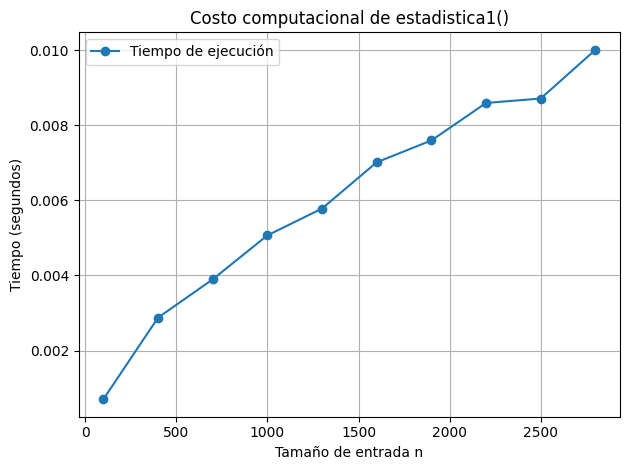

In [ ]:
import time
import matplotlib.pyplot as plt

class Estadistica1Medidor:
    def __init__(self, n):
        self.n = n

    def medir_tiempo(self):
        inicio = time.perf_counter()
        estadistica1(self.n)
        fin = time.perf_counter()
        return fin - inicio

# Ejecución y gráfico
if __name__ == "__main__":
    rangos = list(range(100, 3100, 300))
    tiempos = [Estadistica1Medidor(n).medir_tiempo() for n in rangos]

    plt.plot(rangos, tiempos, marker='o', label="Tiempo de ejecución")
    plt.xlabel("Tamaño de entrada n")
    plt.ylabel("Tiempo (segundos)")
    plt.title("Costo computacional de estadistica1()")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()